In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
tokenizer = Tokenizer()

data = open('irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [3]:
data

'Come all ye maidens young and fair\nAnd you that are blooming in your prime\nAlways beware and keep your garden fair\nLet no man steal away your thyme\nFor thyme it is a precious thing\nAnd thyme brings all things to my mind\nnlyme with all its flavours, along with all its joys\nThyme, brings all things to my mind\nOnce I and a bunch of thyme\ni thought it never would decay\nThen came a lusty sailor\nWho chanced to pass my way\nAnd stole my bunch of thyme away\nThe sailor gave to me a rose\nA rose that never would decay\nHe gave it to me to keep me reminded\nOf when he stole my thyme away\nSleep, my child, and peace attend thee\nAll through the night\nGuardian angels God will send thee\nSoft the drowsy hours are creeping\nHill and dale in slumber sleeping\nI my loving vigil keeping\nWhile the moon her watch is keeping\nWhile the weary world is sleeping\nOer thy spirit gently stealing\nVisions of delight revealing\nBreathes a pure and holy feeling\nThough I roam a minstrel lonely\nMy t

In [4]:
corpus

['come all ye maidens young and fair',
 'and you that are blooming in your prime',
 'always beware and keep your garden fair',
 'let no man steal away your thyme',
 'for thyme it is a precious thing',
 'and thyme brings all things to my mind',
 'nlyme with all its flavours, along with all its joys',
 'thyme, brings all things to my mind',
 'once i and a bunch of thyme',
 'i thought it never would decay',
 'then came a lusty sailor',
 'who chanced to pass my way',
 'and stole my bunch of thyme away',
 'the sailor gave to me a rose',
 'a rose that never would decay',
 'he gave it to me to keep me reminded',
 'of when he stole my thyme away',
 'sleep, my child, and peace attend thee',
 'all through the night',
 'guardian angels god will send thee',
 'soft the drowsy hours are creeping',
 'hill and dale in slumber sleeping',
 'i my loving vigil keeping',
 'while the moon her watch is keeping',
 'while the weary world is sleeping',
 'oer thy spirit gently stealing',
 'visions of delight rev

In [5]:
print(total_words)

2690


In [6]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [15]:
max_sequence_len

16

In [14]:
input_sequences

array([[   0,    0,    0, ...,    0,   51,   12],
       [   0,    0,    0, ...,   51,   12,   96],
       [   0,    0,    0, ...,   12,   96, 1217],
       ...,
       [   0,    0,    0, ...,    0,   47,  105],
       [   0,    0,    0, ...,   47,  105,  138],
       [   0,    0,    0, ...,  105,  138,  184]])

In [7]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [8]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [9]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [10]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=10, verbose=1)
#print model.summary()
print(model)

Epoch 1/10
377/377 [==============================] - 27s 59ms/step - loss: 6.8660 - accuracy: 0.0653
Epoch 2/10
377/377 [==============================] - 21s 56ms/step - loss: 5.7587 - accuracy: 0.10320s - loss: 5.7585 - accuracy
Epoch 3/10
377/377 [==============================] - 21s 56ms/step - loss: 4.8311 - accuracy: 0.1633
Epoch 4/10
377/377 [==============================] - 20s 54ms/step - loss: 3.8413 - accuracy: 0.2474
Epoch 5/10
377/377 [==============================] - 20s 53ms/step - loss: 2.9711 - accuracy: 0.3730
Epoch 6/10
377/377 [==============================] - 21s 56ms/step - loss: 2.3546 - accuracy: 0.4735
Epoch 7/10
377/377 [==============================] - 22s 58ms/step - loss: 1.8357 - accuracy: 0.5712
Epoch 8/10
377/377 [==============================] - 21s 55ms/step - loss: 1.4825 - accuracy: 0.6508
Epoch 9/10
377/377 [==============================] - 21s 56ms/step - loss: 1.2697 - accuracy: 0.6976
Epoch 10/10
377/377 [==============================] -

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

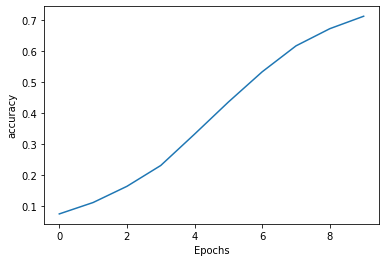

In [12]:
plot_graphs(history, 'accuracy')

In [13]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)


C:\xampp1\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


I've got a bad feeling about this barley and grant my desire light you will find me by night a love gone by the sash of men faded i will find the pleasures of life sing no more up and love roving ago gone to the left at love and gone and the young ones turning grey its room for the wearin o lonely all the color too i did i love gone and by the fields of athenry rattling a wild rover no more he hear in the morning of night you as our comrades who hear you stole to see the fleet foot of thems
